Ray Reyes

 - Collaborator 1
 - Collaborator 2
 - et

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Thursday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [42]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
np.random.seed(1)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 1 --> simple linear regression
                                   noise=30, 
                                   bias = bias, 
                                   random_state=1, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408,28.865495
1,-2.301539,1.744812,-0.761207,0.319039,-0.249370,4.937580
2,1.462108,-2.060141,-0.322417,-0.384054,1.133769,-39.935140
3,-1.099891,-0.172428,-0.877858,0.042214,0.582815,-49.524568
4,-1.100619,1.144724,0.901591,0.502494,0.900856,244.382026
...,...,...,...,...,...,...
295,-0.081570,1.529248,0.686483,1.717089,-0.804277,343.244347
296,0.300254,-0.429596,0.805913,-0.219552,-0.251852,20.913333
297,-1.326490,0.308204,1.115489,1.008196,-3.016032,-8.753043
298,-1.619646,2.005141,-0.187626,-0.148941,1.165335,182.614426


In [46]:
# Your code here. Add cells as needed.
x_columns = [f'x{n+1}' for n in range(reg_df.shape[1] - 1)]

X = reg_df[x_columns]
y = reg_df['y']

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=1)



In [48]:
from sklearn.metrics import r2_score


# Train the model
model_lr.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model_lr.predict(X_test)

# Calculate R^2
r2 = r2_score(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print(f'R^2: {r2:.2f}')
print(f'MSE: {mse:.2f}')

R^2: 0.95
MSE: 1131.99


#### Your written answers here

What are your model parameters?
 - The only paramaters set here are setting the test size to 0.2 and having the random state set to 1.

What were your MSE and R^2?
 - My MSE was 1131.99
 - My R2 waas 0.95
 



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [54]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 1 --> simple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

Xa = (0.6*X[:,2] + 0.4*X[:,4]).reshape(-1,1)
X = np.hstack((X, Xa))
coef = np.append(coef, 0)


column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

reg2_df


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,-0.019007,-0.081434,-0.014396,0.005781,0.041543,-0.030161,0.001037,-0.024288,-0.004252,0.007980,-25.236430
1,0.008066,0.007271,-0.012255,-0.062581,0.032108,0.030362,-0.005309,-0.017288,0.012837,0.005491,-12.537903
2,0.032845,-0.063578,-0.009525,0.020147,-0.019702,-0.053699,-0.011607,-0.039859,-0.024391,-0.013596,-22.264183
3,-0.009999,-0.125704,0.015806,-0.008291,-0.057393,-0.063838,-0.005211,0.097825,-0.033332,-0.013473,-37.087455
4,-0.004742,0.057318,0.009264,-0.047371,0.032000,-0.038891,-0.037838,-0.076428,0.050613,0.018358,-14.858578
...,...,...,...,...,...,...,...,...,...,...,...
295,0.033185,-0.075321,0.052960,-0.003697,0.096823,-0.053486,0.020781,0.008049,-0.005098,0.070505,-10.690334
296,0.036346,-0.018425,-0.013462,0.021404,-0.004093,-0.001489,0.049048,0.000154,0.031826,-0.009714,-18.209533
297,-0.001014,-0.073223,0.026779,0.024211,-0.042056,0.014678,-0.007562,0.000057,-0.040801,-0.000755,-19.360755
298,-0.025448,0.043475,0.029118,0.053766,-0.031705,0.033905,-0.016191,0.072865,-0.004394,0.004789,-9.283116


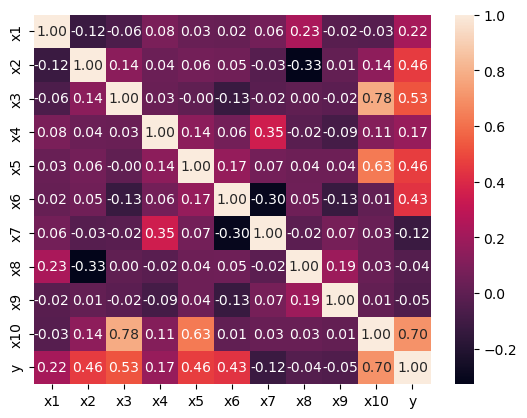

In [55]:
corr = reg2_df.corr()

sns.heatmap(corr, annot=True, fmt = '.2f')
plt.show()

In [56]:
#candidate_idx = [0, 1, 2, 3, 4, 5, 9]
candidate_idx = [0,1,2,3,4,5,6,7,8,9,]
Z = X[:,candidate_idx]
Z_names = [column_names[idx] for idx in candidate_idx]

Z_names

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2)

model_lr =LinearRegression()
model_lr.fit(Z_train, y_train)

R2_test = model_lr.score(Z_test, y_test)
R2_train = model_lr.score(Z_train, y_train)

print(f'R2_train: {R2_train:.2f}')
print(f'R2_test: {R2_test:.2f}')

R2_train: 0.87
R2_test: 0.89


In [57]:

# Generate predictions for the test set
predictions = model_lr.predict(Z_test)

# Calculate the Mean Squared Error
msee = mean_squared_error(y_test, predictions)

print(f'Mean Squared Error: {msee:.2f}')

Mean Squared Error: 7.71


In [15]:
def _model(intercept, coef, feature_names):
	model_str = f"Intercept: {intercept}\n"
	for name, c in zip(feature_names, coef):
		model_str += f"{name}: {c}\n"
	return model_str

print(_model(model_lr.intercept_, model_lr.coef_, Z_names), "Model Name: Fit Model")

Intercept: -15.46847885768424
x1: 59.67468746860077
x2: 71.22648570695979
x3: -1187569216568503.5
x4: 12.171235749312387
x5: -791712811045679.5
x6: 75.49855583949476
x7: -6.449032406126055
x8: -0.5009461909018975
x9: 0.7717274925294023
x10: 1979282027614341.5
 Model Name: Fit Model


#### Your written answers here

What are your model parameters?
 - Besides the paramaters set to generate the data the most signifcant paramater used is the canadate_idx list. this tels the model which values of x to use.

Which features (x1, x2...) were significant? Which were co-linear?
 - x2, x6, and x1 were the most co lineiur 
 
What were your MSE and R^2?
 - My MSE was 7.71
 - I calculated the r2 for bothe the test and the training model. R2_train: 0.87
R2_test: 0.89




## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [18]:
housing_df = pd.read_csv('kc_house_data.csv')
print(housing_df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


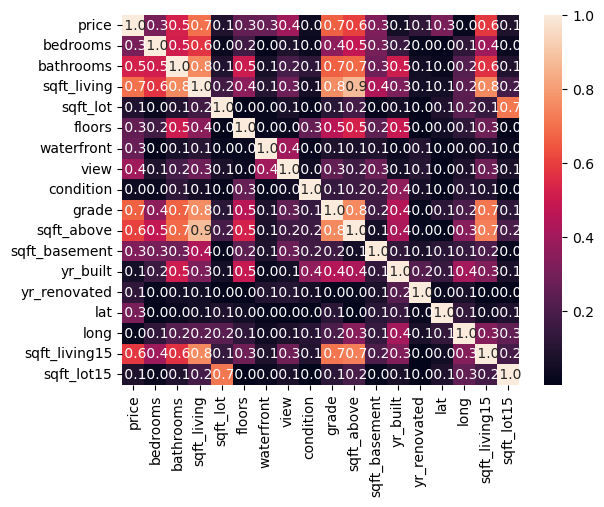

In [ ]:
#housing_df.drop(columns=['id', 'date', 'zipcode'], inplace=True)
corr = housing_df.corr()

sns.heatmap(np.abs(corr), annot=True, fmt = ' .1f')
# decimales change the size
plt.show()

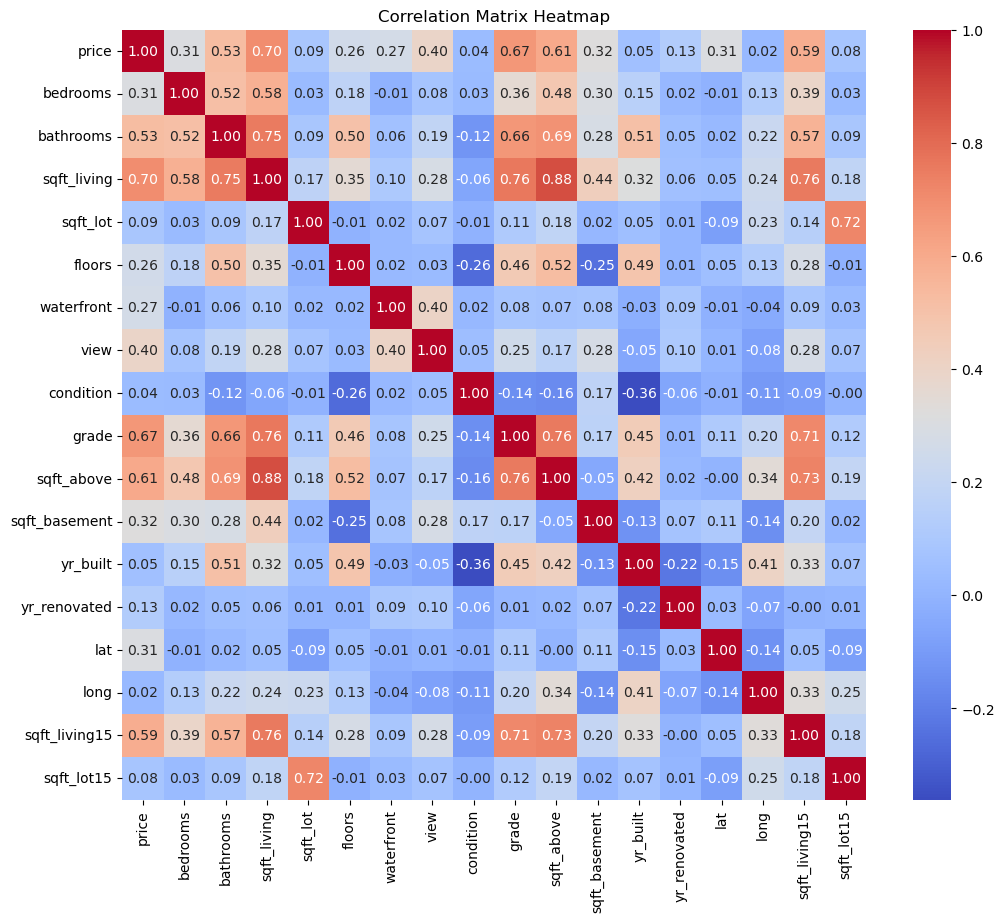

In [60]:
# Exclude non-numeric columns
numeric_df = housing_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [61]:
X = housing_df[['bathrooms', 'sqft_living', 'grade']]
y = housing_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


                

In [106]:
from sklearn.preprocessing import StandardScaler
# fit to the training data so you can apply the same scaling to the test data

ss = StandardScaler()
ss.fit(X_train)

X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test) 


model_linreg = LinearRegression()
model_linreg.fit(X_scaled_train, y_train)

LinearRegression()

In [ ]:
from sklearn.linear_model import Lasso, Ridge

y = housing_df['price']
x = housing_df.drop(columns=['price'])  
# missing steps
model_lasso = Lasso(alpha= 10)
model_lasso.fit(X_scaled_train, y_train)

#Evaluate the model by making predictions and computing metrics
y_pred = model_lasso.predict(X_scaled_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 83072591083.55
R^2 Score: 0.52


In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Select the features and target variable
features = ['sqft_living', 'bedrooms', 'floors']
X = housing_df[features]
y = housing_df['price']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate R^2
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2:.2f}')

# Show the coefficients of the regression
coefficients = model.coef_
for feature, coef in zip(features, coefficients):
    print(f'{feature}: {coef:.2f}')

R^2: 0.52
sqft_living: 279503.47
bedrooms: -49652.04
floors: 2986.05


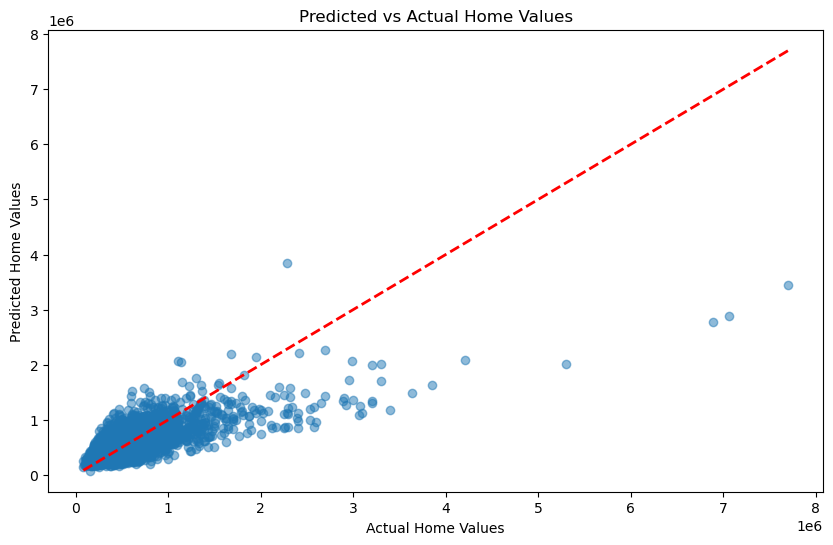

In [132]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha= 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Home Values')
plt.ylabel('Predicted Home Values')
plt.title('Predicted vs Actual Home Values')
plt.show()

#### Your written answers here
Which features are you using and why?
 
 - Sqft, beefrooms and floors becuase we belived that they were the best predictors of price.

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [140]:
from sklearn.linear_model import Ridge

# Your code here. Add cells as needed.

# zip code and date were already droped 
X = housing_df.drop(columns=['price'])

feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [182]:
# Scale the features
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

# maximiza alpha.
ridge_model = Ridge(alpha= 5000)
ridge_model.fit(X_scaled_train, y_train)

# Predict and calculate R^2
y_pred = ridge_model.predict(X_scaled_test)
r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2:.2f}')

R^2: 0.66


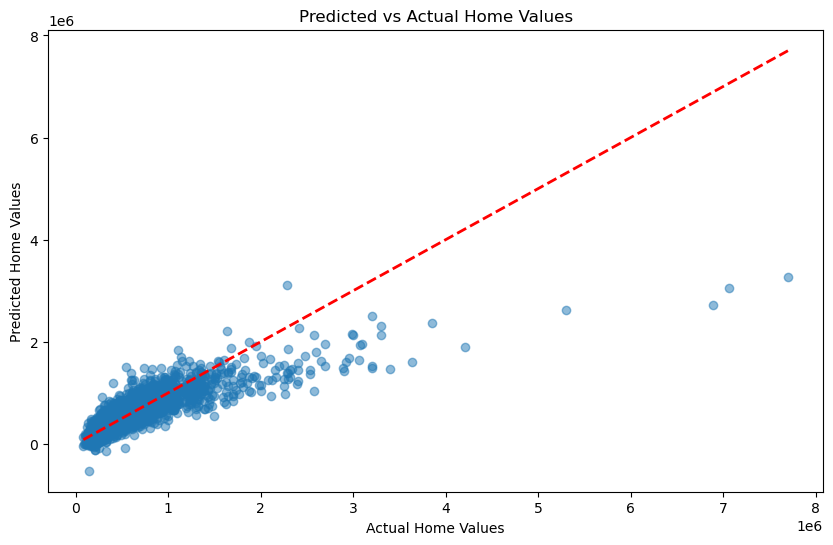

In [154]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha= 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Home Values')
plt.ylabel('Predicted Home Values')
plt.title('Predicted vs Actual Home Values')
plt.show()

### Your written answers here
Which regression did you use?
 - I used the ridge regression.

Does your regularized model look better than your MLR? How so?
 - The regularized model looks better than the MLR becasue more of the points follow the predicted line. we could have assumed it would looked like that because the R2 was much higher on this model.


### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [178]:
# Your code here. Add cells as needed.

# Split the data into homes below and above $1M sale price
below_1M = housing_df[housing_df['price'] < 1000000]
above_1M = housing_df[housing_df['price'] >= 1000000]

# Separate features and target variable for below $1M
X_below = below_1M.drop(columns=['price'])
y_below = below_1M['price']

# Separate features and target variable for above $1M
X_above = above_1M.drop(columns=['price'])
y_above = above_1M['price']

# Scale the features
scaler_below = StandardScaler()
X_below_scaled = scaler_below.fit_transform(X_below)

scaler_above = StandardScaler()
X_above_scaled = scaler_above.fit_transform(X_above)

# Split the data into training and testing sets
X_below_train, X_below_test, y_below_train, y_below_test = train_test_split(X_below_scaled, y_below, test_size=0.2, random_state=1)
X_above_train, X_above_test, y_above_train, y_above_test = train_test_split(X_above_scaled, y_above, test_size=0.2, random_state=1)

# Fit a Ridge model to each of the split data sets
ridge_below = Ridge(alpha= 0.001)
ridge_below.fit(X_below_train, y_below_train)

ridge_above = Ridge(alpha= 0.1)
ridge_above.fit(X_above_train, y_above_train)

# Predict and calculate R^2 for below $1M
y_below_pred = ridge_below.predict(X_below_test)
r2_below = r2_score(y_below_test, y_below_pred)

# Predict and calculate R^2 for above $1M
y_above_pred = ridge_above.predict(X_above_test)
r2_above = r2_score(y_above_test, y_above_pred)

print(f'R^2 for homes below $1M: {r2_below:.2f}')
print(f'R^2 for homes above $1M: {r2_above:.2f}')

R^2 for homes below $1M: 0.69
R^2 for homes above $1M: 0.55


 ### Your written answers here

 What are the $R^2$ for the two models?

  - My r2 for homes above 1 million was 0.55 and for homes below 1 million it was 0.69.
 
